# WATER POTABILITY DETECTION

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# EDA  

**About The Dataset**  
The dataset can be found here : https://www.kaggle.com/adityakadiwal/water-potability  

**Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.  

**Columns**

1. pH value:

PH is an important parameter in evaluating the acid–base balance of water. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5.
2. Hardness:  
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels.  

3. Solids (Total dissolved solids - TDS):  
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is an important parameter for the use of water. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:  
Chlorine and chloramine are the major disinfectants used in public water systems. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:  
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. The principal commercial use of sulfate is in the chemical industry. It ranges from 3 to 30 mg/L in most freshwater supplies.
6. Conductivity:  
Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:  
TOC(Total Organic Carbon) is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water.

8. Trihalomethanes:  
THMs are chemicals which may be found in water treated with chlorine. THM levels up to 80 ppm is considered safe in drinking water.  
9. Turbidity:  
It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. WHO recommended value is 5.00 NTU.

10. Potability:  
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [ ]:
# reading dataset
df = pd.read_csv("water_potability.csv")

In [ ]:
# display first five rows
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# the shape of our dataset
df.shape

(3276, 10)

In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

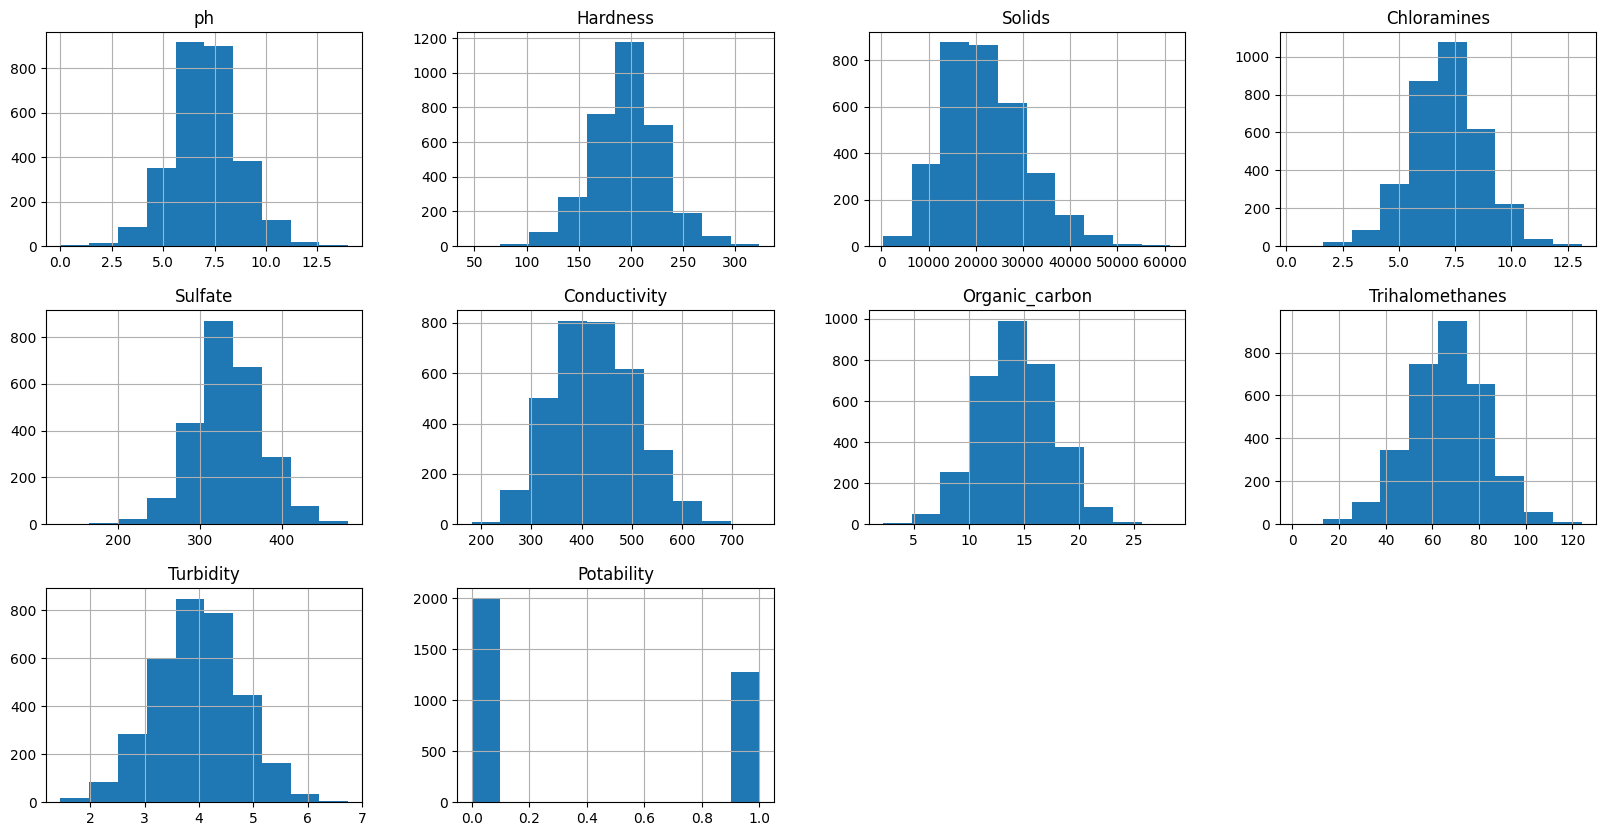

In [ ]:
df.hist(figsize = (20,10), layout = (3,4))
plt.show()

# **Handling Missing Values**

In [ ]:
df.isnull().sum() # total number of NaN values in all columns

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# Replace NaN values with medians of those columns
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

# **Data Visualization**

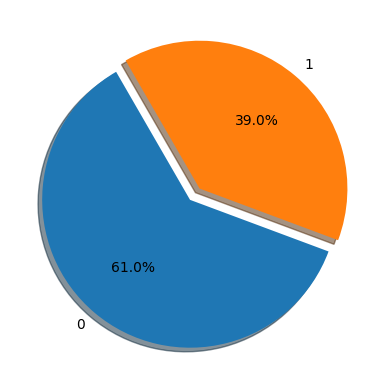

In [ ]:
values = df['Potability'].value_counts().to_list()
labels = df['Potability'].value_counts().index.to_list()
plt.pie(values, labels = labels, autopct = "%1.1f%%", explode = [0.05, 0.05], shadow = True, startangle = 120)
plt.show()
# Here 1 means water is potable(safe for human consumption) and 0 means water is not potable


**Splitting data into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Potability', axis = 1)
y = df['Potability']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)
# This will create a training set which consists of 70% of the original dataset and testing set contains 30% data

In [ ]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((2293, 9), (2293,), (983, 9), (983,))

# Standardizing the data

In [ ]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(xtrain, ytrain)
xtrain_scaled = scale.transform(xtrain)
xtest_scaled = scale.transform(xtest)


# **Model Selection**

Checking just the accuracy of our model will not be important in this case. It is more important that we classify the water that is not drinkable properly, because if our model classifies non drinkable water as drinkable it will be very problematic.


#Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain_scaled, ytrain)

LogisticRegression()

In [ ]:
yhat_logreg = logreg.predict(xtest_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(yhat_logreg, ytest), confusion_matrix(yhat_logreg, ytest),
      classification_report(yhat_logreg, ytest), sep = '\n\n')

0.5930824008138352

[[583 400]
 [  0   0]]

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       983
           1       0.00      0.00      0.00         0

    accuracy                           0.59       983
   macro avg       0.50      0.30      0.37       983
weighted avg       1.00      0.59      0.74       983



In [ ]:
logreg_score = accuracy_score(yhat_logreg, ytest)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain_scaled, ytrain)
yhat_knn = knn.predict(xtest_scaled)

In [ ]:
print(accuracy_score(yhat_knn, ytest), confusion_matrix(yhat_knn, ytest),
      classification_report(yhat_knn, ytest), sep = '\n\n')

0.6103763987792472

[[446 246]
 [137 154]]

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       692
           1       0.39      0.53      0.45       291

    accuracy                           0.61       983
   macro avg       0.58      0.59      0.57       983
weighted avg       0.65      0.61      0.62       983



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(xtrain_scaled, ytrain)
yhat_knn = knn.predict(xtest_scaled)

In [ ]:
print(accuracy_score(yhat_logreg, ytest), confusion_matrix(yhat_logreg, ytest),
      classification_report(yhat_logreg, ytest), sep = '\n\n')

0.5930824008138352

[[583 400]
 [  0   0]]

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       983
           1       0.00      0.00      0.00         0

    accuracy                           0.59       983
   macro avg       0.50      0.30      0.37       983
weighted avg       1.00      0.59      0.74       983



In [ ]:
knn_score = accuracy_score(yhat_knn, ytest)

#SVM


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain_scaled, ytrain)
yhat_svc = svc.predict(xtest_scaled)

In [ ]:
print(accuracy_score(yhat_svc, ytest), confusion_matrix(yhat_svc, ytest),
      classification_report(yhat_svc, ytest), sep = '\n\n')

0.6703967446592065

[[547 288]
 [ 36 112]]

              precision    recall  f1-score   support

           0       0.94      0.66      0.77       835
           1       0.28      0.76      0.41       148

    accuracy                           0.67       983
   macro avg       0.61      0.71      0.59       983
weighted avg       0.84      0.67      0.72       983



In [ ]:
svc_score = accuracy_score(yhat_svc, ytest)



This has been the best predictor so far as it is classifying the non-drinkable water well and has a higher overall accuracy.


In [ ]:

scores = [logreg_score, svc_score, knn_score]
scores_df = pd.DataFrame(scores, index = ['Logistic Regression', 'Support Vector Classifier',  'K-nearest neighbors'])
scores_df.rename(columns = {0 : 'Scores'}, inplace = True)

<Axes: >

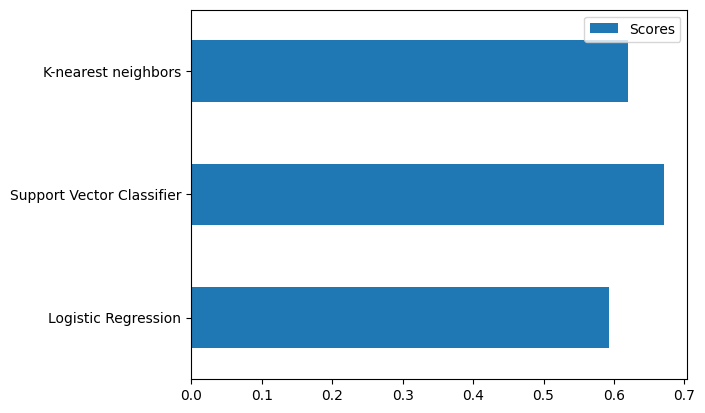

In [ ]:
scores_df.plot(kind = 'barh')

# **So choosing the Support Vector Classifier would be the best choice for our case.**